# Bamboozled by box (and whiskers) plots
This notebook contains the code for the figures and analysis associated with the chapter *Bamboozled by box (and whiskers) plots* in *The manufacturing engineers guide to Statistical Process Control and Data Driven Improvement*. <br><br> Contact Jim Lehner by email at James.Lehner@gmail.com.

To install ```improvement.py``` directly from GitHub without cloning the repository, enter the following command using the command prompt: ```pip install git+https://github.com/jimlehner/improvement```. <br><br>
For more details visit https://github.com/jimlehner/improvement

In [73]:
# Import libraries 
import process.improvement as pi
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Display plots as static images embedded in notebook
%matplotlib inline

### Function for calculating the features of a box plot (boxplotfeatures)

In [88]:
# Function for calculating box plots features (5-number summary and outliers)
def boxplotfeatures(df, column, round_value=2):
    
    """
    Calculate key features of a box plot for a specific column in a DataFrame.

    This function calculates the median, first quartile (Q1), third quartile (Q3), 
    interquartile range (IQR), and the upper and lower bounds of a specified column 
    in a DataFrame. It also identifies outliers based on the calculated bounds.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing the data.
        
    column : str
        The name of the column in `df` for which to calculate the box plot features.
        
    round_value : int, optional (default=2)
        The number of decimal places to round the calculated values to.

    Returns:
    --------
    results_df : pandas.DataFrame
        A DataFrame containing the calculated box plot features:
        - 'Median': The median of the data.
        - 'Q1': The 25th percentile of the data.
        - 'Q3': The 75th percentile of the data.
        - 'IQR': The interquartile range (Q3 - Q1).
        - 'Lower bound': The largest value that is greater than or equal to Q1 - 1.5*IQR.
        - 'Upper bound': The largest value in the data that is less than Q3 + 1.5*IQR.
    
    outliers : pandas.DataFrame
        A DataFrame containing the rows in `df` where the values in the specified column 
        are considered outliers, i.e., values below the lower bound or above the upper bound.
    """
    
    # Specify multiplier to 1.5
    multiplier = 1.5
    
    # Calculate median
    median = df[column].median()
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Calculate the upper and lower bounds
    lower_bound = max(Q1 - multiplier*IQR, min(df[column]))
    upper_bound = max(df[column][df[column] < Q3 + multiplier * IQR])
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'Feature': ['Median', 'Q1', 'Q3', 'IQR', 'Lower bound', 'Upper bound'],
        'Value': [median, Q1, Q3, IQR, lower_bound, upper_bound]
    }).round(round_value)
    
    # Return "No outliers" if outliers DataFrame is empty
    if outliers.empty:
        return results_df, "No outliers"
    else:
        return results_df, outliers

### Get data

In [75]:
# Establish dataset URL
dataset_url = 'https://raw.githubusercontent.com/jimlehner/ddi-datasets/main/data/death-to-birth-ratios-vienna-general-vs-dublin-general.csv'

In [76]:
# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()
df = df.drop(columns='Note')
df

,Hospital,Year,Births,Deaths,Rate (%)
0,Vienna General,1784,284,6,2.1
1,Vienna General,1785,899,13,1.4
2,Vienna General,1786,"1,151",5,0.4
3,Vienna General,1787,"1,407",5,0.4
4,Vienna General,1788,"1,425",5,0.4
...,...,...,...,...,...
127,Dublin General,1845,1411,35,2.5
128,Dublin General,1846,2025,17,0.8
129,Dublin General,1847,1703,47,2.8
130,Dublin General,1848,1816,35,1.9


In [77]:
# Split dataframe into two dataframes: Vienna General (VG_df) and Dublin General (DF_df)
grouped_df = df.groupby('Hospital')
# Create dataframe of only Vienna General data
VG_df = grouped_df.get_group('Vienna General')
# Create dataframe of only Dublin General data
DG_df = grouped_df.get_group('Dublin General').reset_index(drop=True)

In [78]:
# Create list of hospitals
# hospitals = df['Hospital'].unique().tolist()

## Visualize data with box plots
### Figure 2: Vienna General death-to-birth ratios: 1784 to 1849

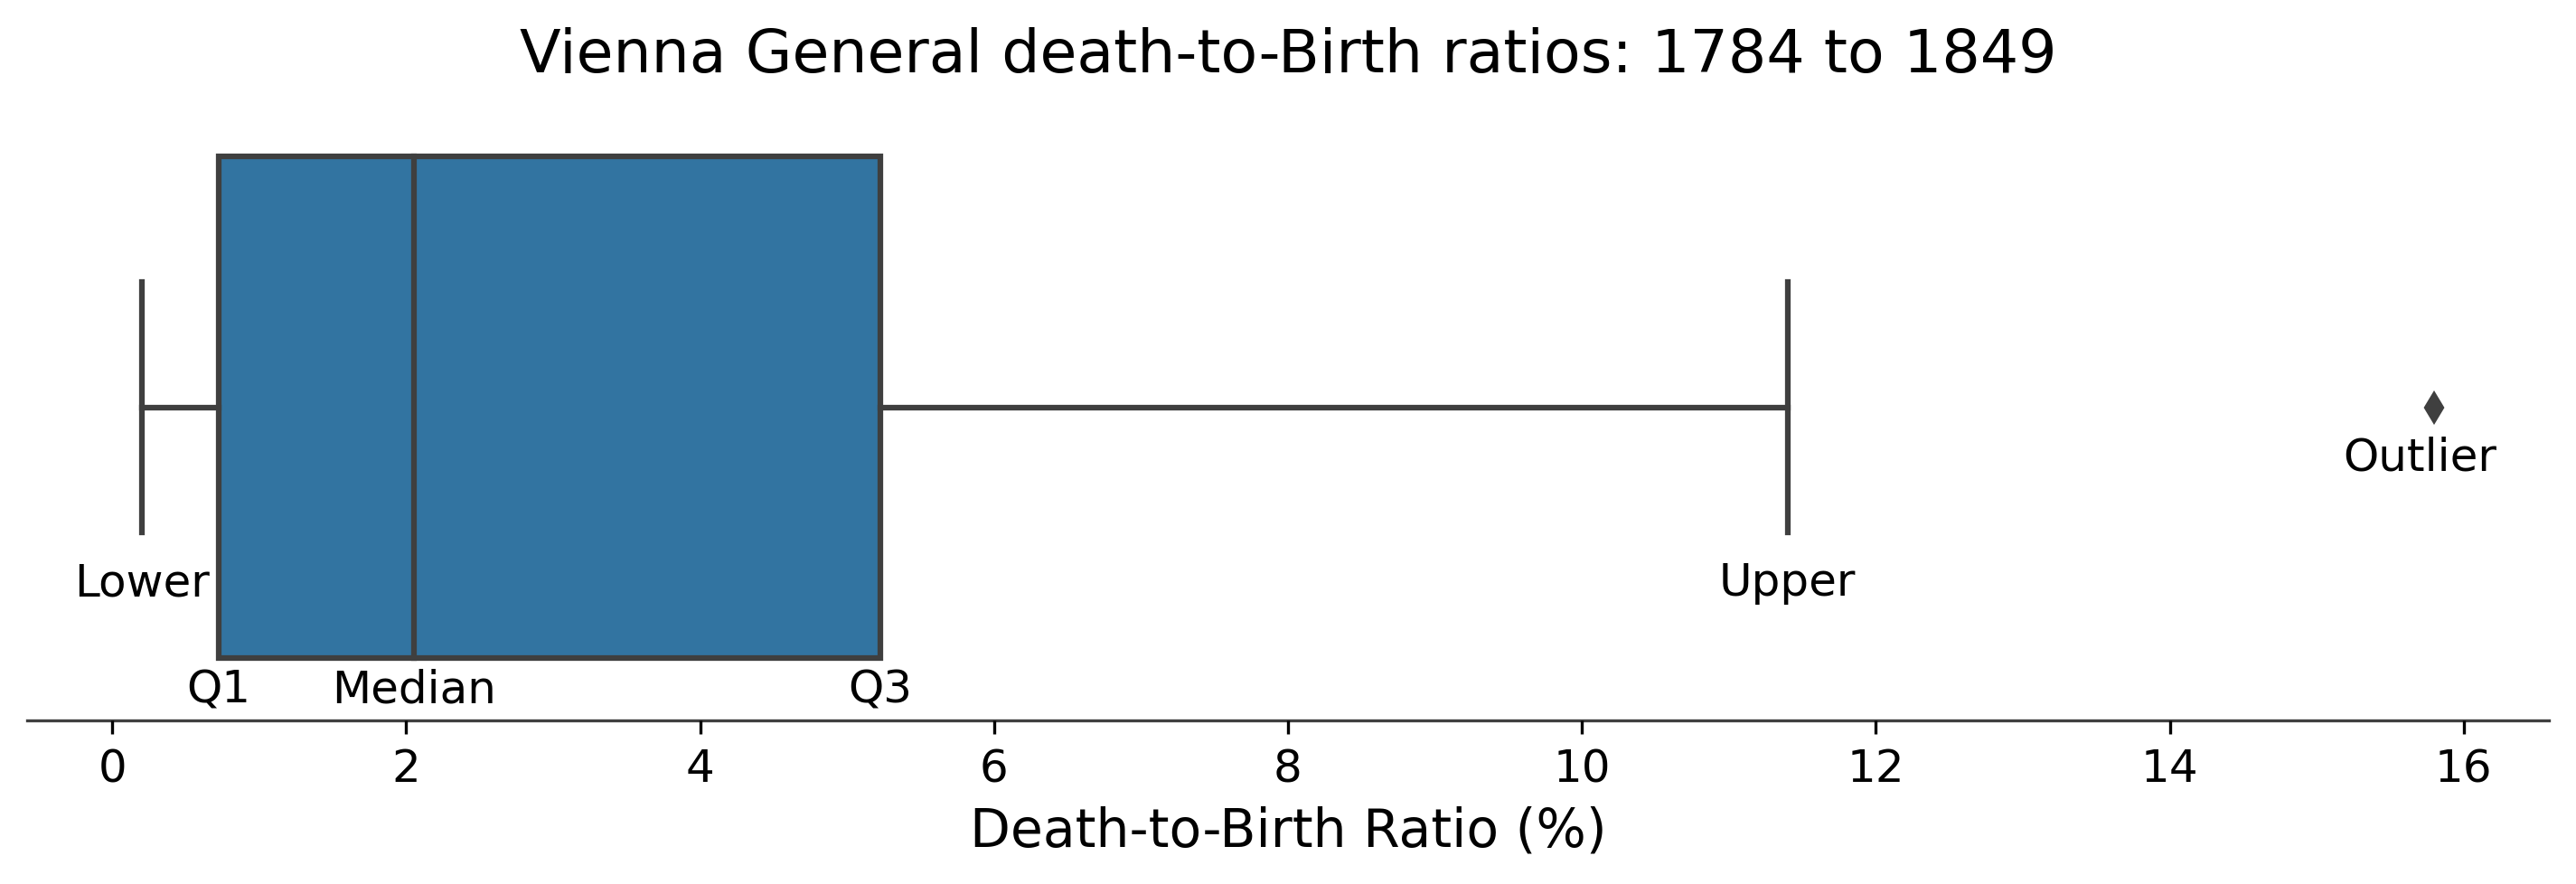

In [79]:
# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,3), dpi=300)

# Create box plot using seaborn (sns.boxplot)
sns.boxplot(data=VG_df, x='Rate (%)', y='Hospital')

# Remove spines and set alpha levels
ax.spines[['top','right','left']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)

# Specify title
plt.title('Vienna General death-to-Birth ratios: 1784 to 1849', fontsize=16)

# Remove ylabel
ax.set_ylabel('')
# Specify xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)
# Remove yticks
ax.set_yticks([])

# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# Add annotations to 5-number summary and outlier
# Lower
plt.annotate('Lower', xy=(0.2,0),
            xytext=(0.2,0.3), ha='center',
            fontsize=12)
# Q1
plt.annotate('Q1', xy=(0.725,0),
            xytext=(0.725,0.47), ha='center',
            fontsize=12)
# Median
plt.annotate('Median', xy=(2.05,0),
            xytext=(2.05,0.47), ha='center',
            fontsize=12)
# Q3
plt.annotate('Q3', xy=(5.225,0),
            xytext=(5.225,0.47), ha='center',
            fontsize=12)
# Upper
plt.annotate('Upper', xy=(11.4,0),
            xytext=(11.4,0.3), ha='center', 
             fontsize=12)
# Outlier
plt.annotate('Outlier', xy=(15.7,0),
            xytext=(15.7,0.1), ha='center',
             fontsize=12)

plt.show()

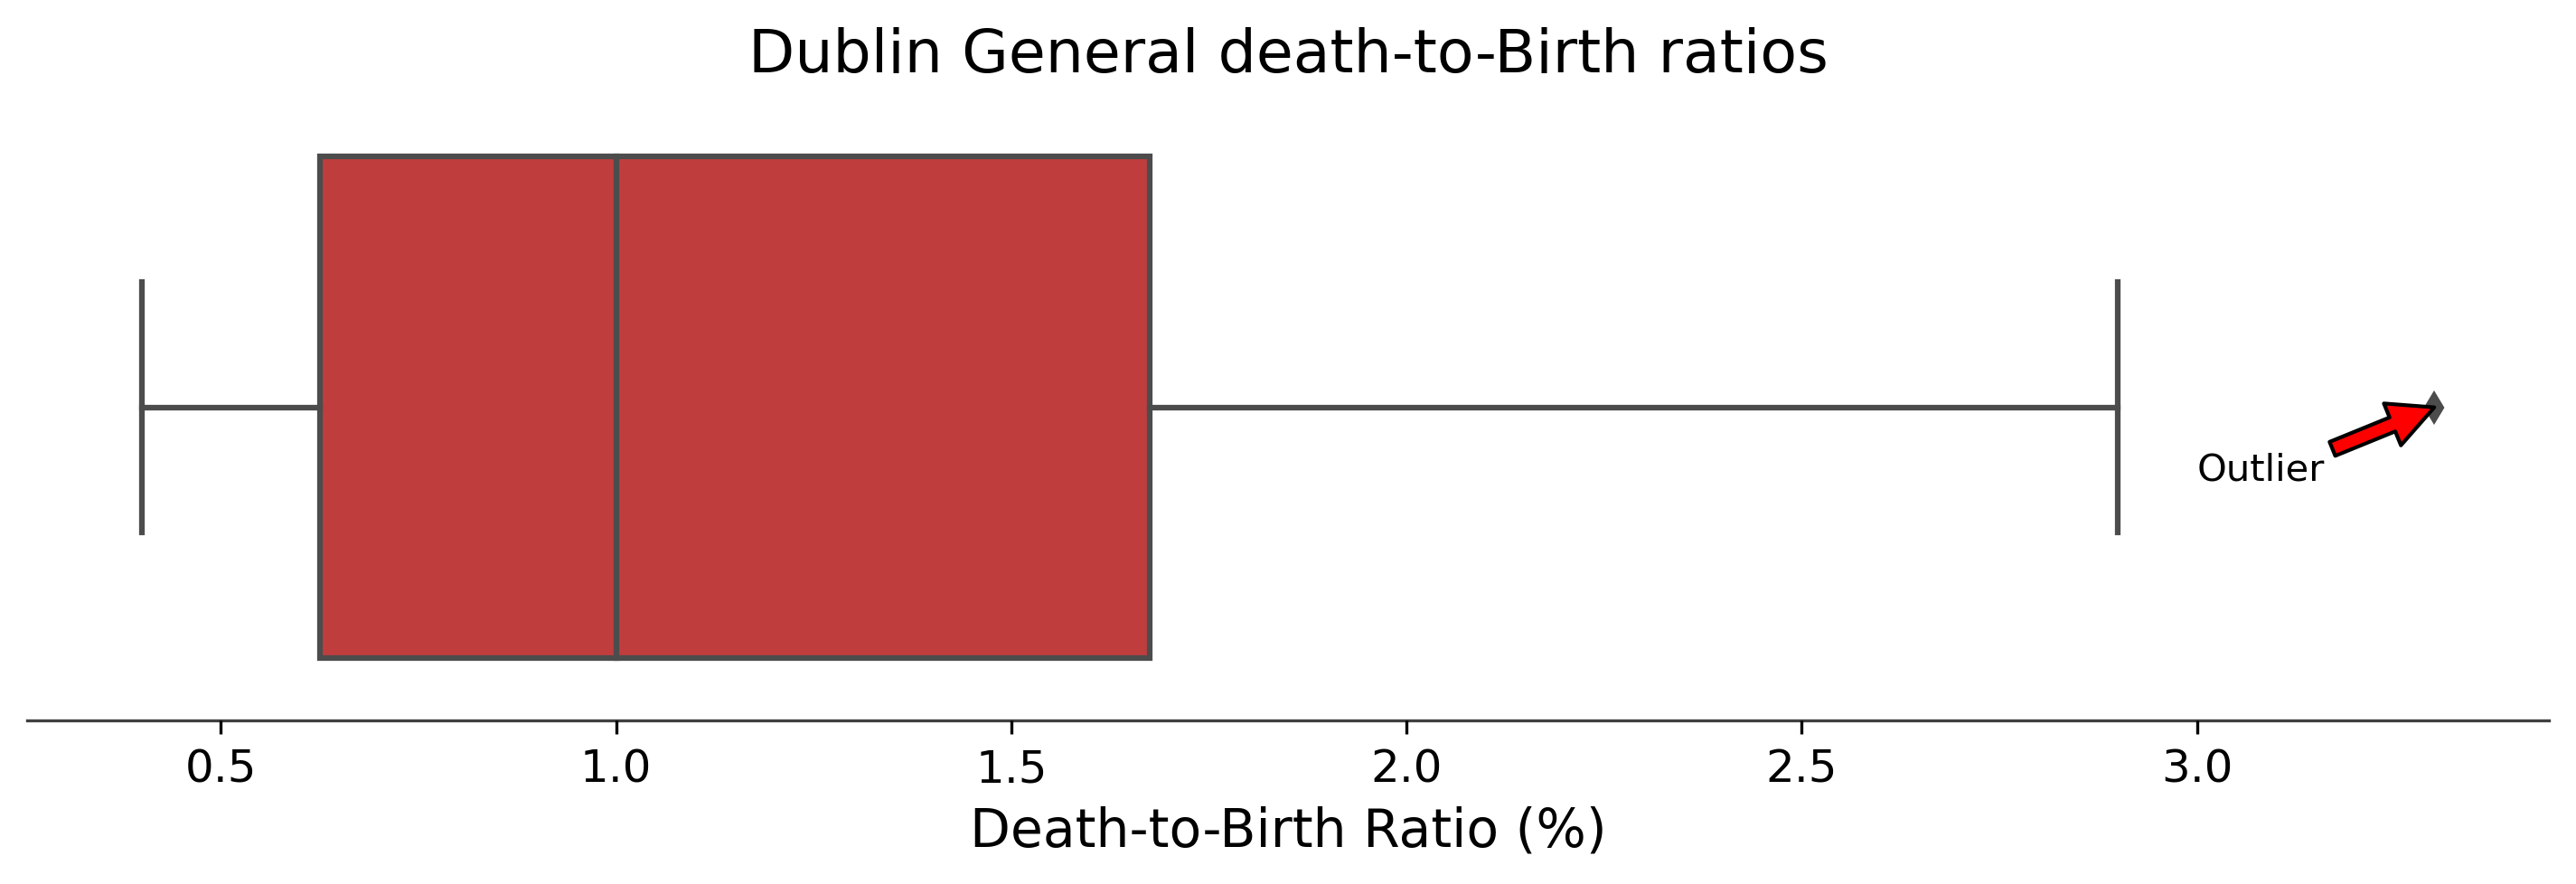

In [80]:
# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,3), dpi=300)

# Create box plot using seaborn (sns.boxplot)
sns.boxplot(data=DG_df, x='Rate (%)', y='Hospital', color='tab:red')

# Remove spines and set alpha levels
ax.spines[['top','right','left']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)

# Set title
plt.title('Dublin General death-to-Birth ratios', fontsize=16)

# Remove ylabel
ax.set_ylabel('')
# Specify xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)
# Remove yticks
ax.set_yticks([])

# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# Annotate outlier
plt.annotate('Outlier', xy=(3.3,0),
            xytext=(3,0.1),
            arrowprops=dict(facecolor='red'), va='center')

plt.show()

### Figure 3: Death-to-birth ratios by hospital

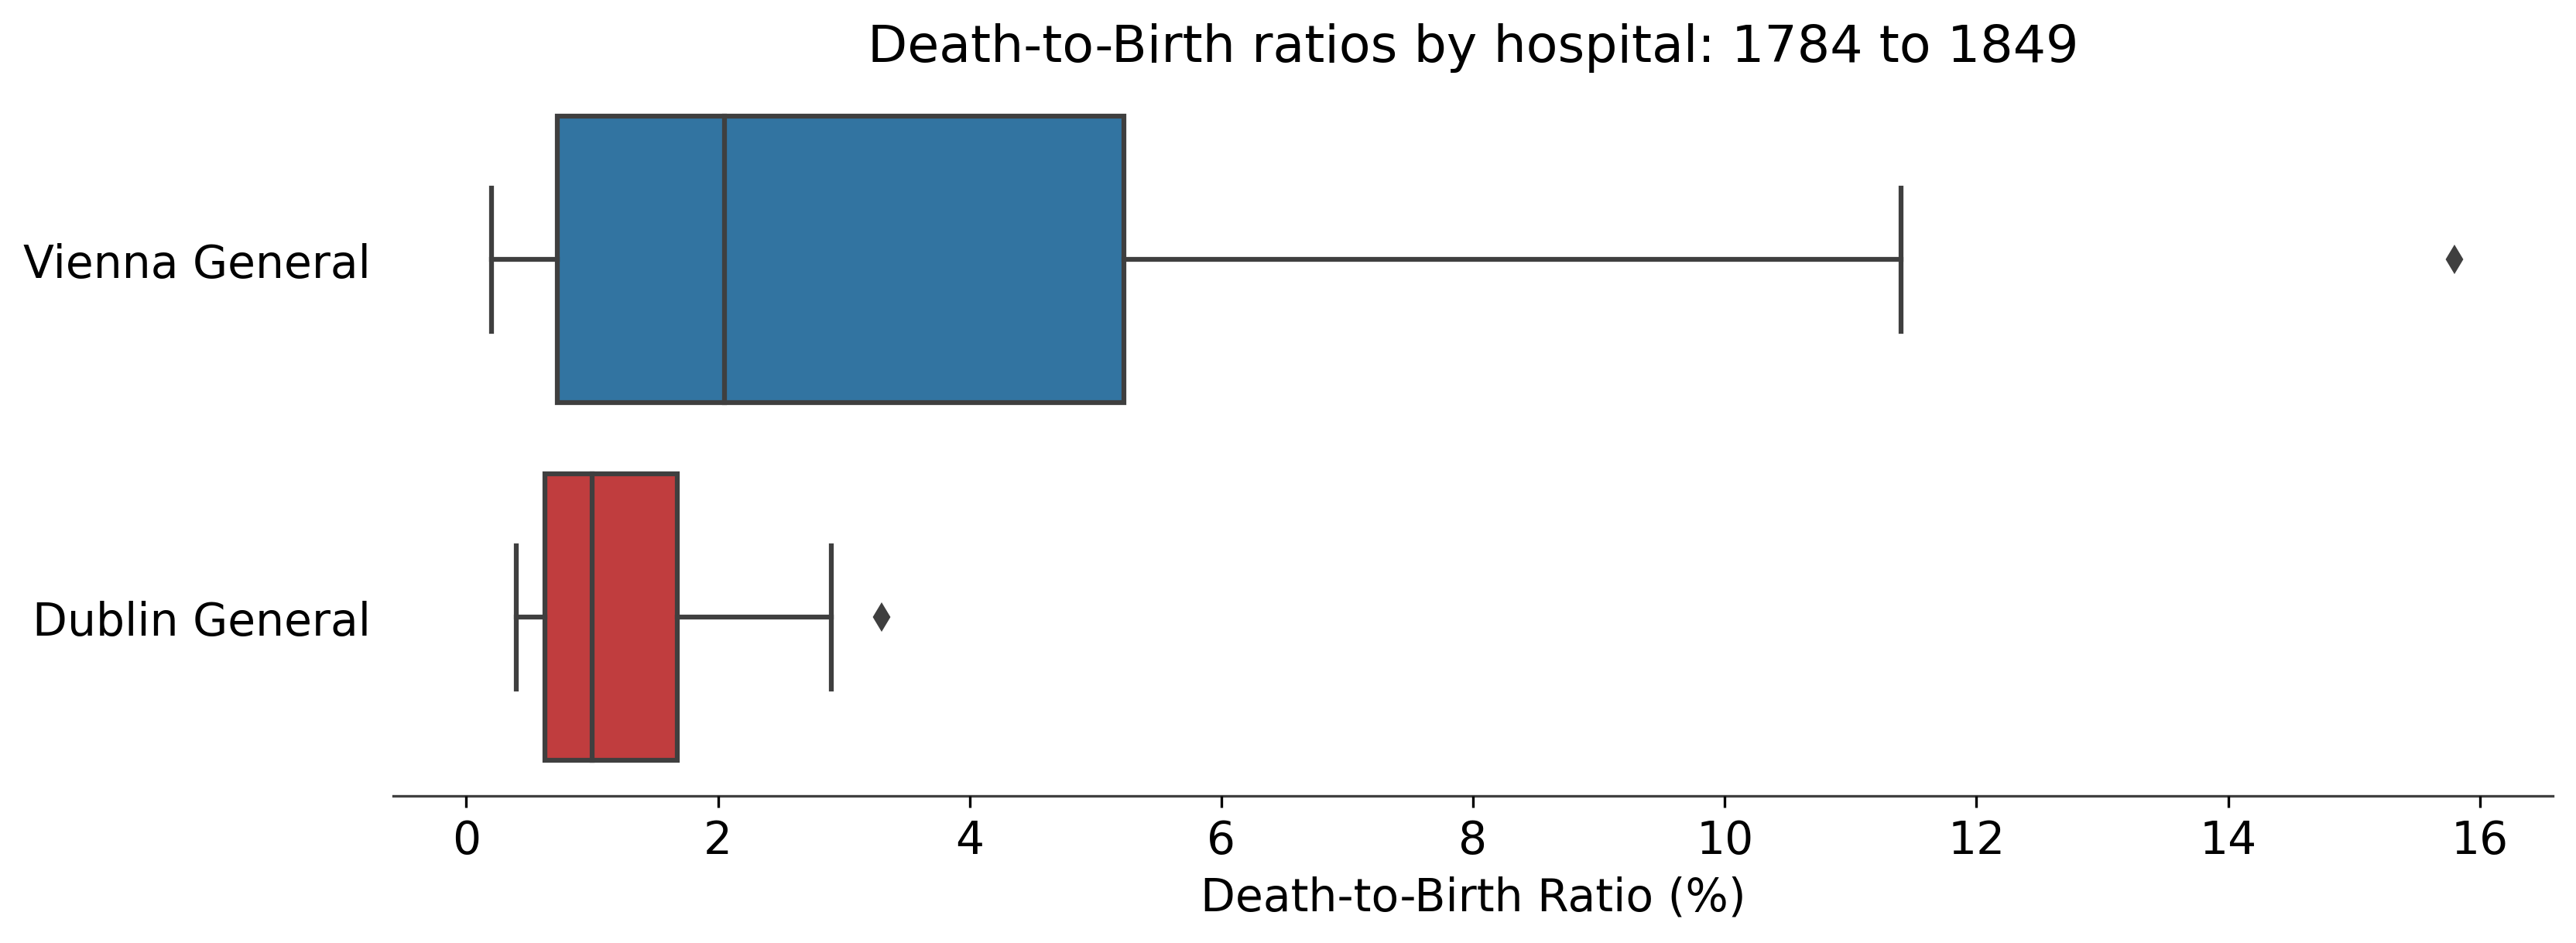

In [81]:
# Specify hospital order
hospital_order = ['Vienna General', 'Dublin General']

# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Create box plot 
sns.boxplot(data=df, x='Rate (%)', y='Hospital', 
            palette=['tab:blue','tab:red'],
           order=hospital_order)

# Remove spines and set alpha levels
ax.spines[['top','right','left']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)

# Specify the plot title
plt.title('Death-to-Birth ratios by hospital: 1784 to 1849', fontsize=16)

# Remove the ylabel
ax.set_ylabel('')
# Specify the xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)

# Remove ticks but leave labels
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)

# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

### Generate same plot as above but with annotations and arrows for the outliers

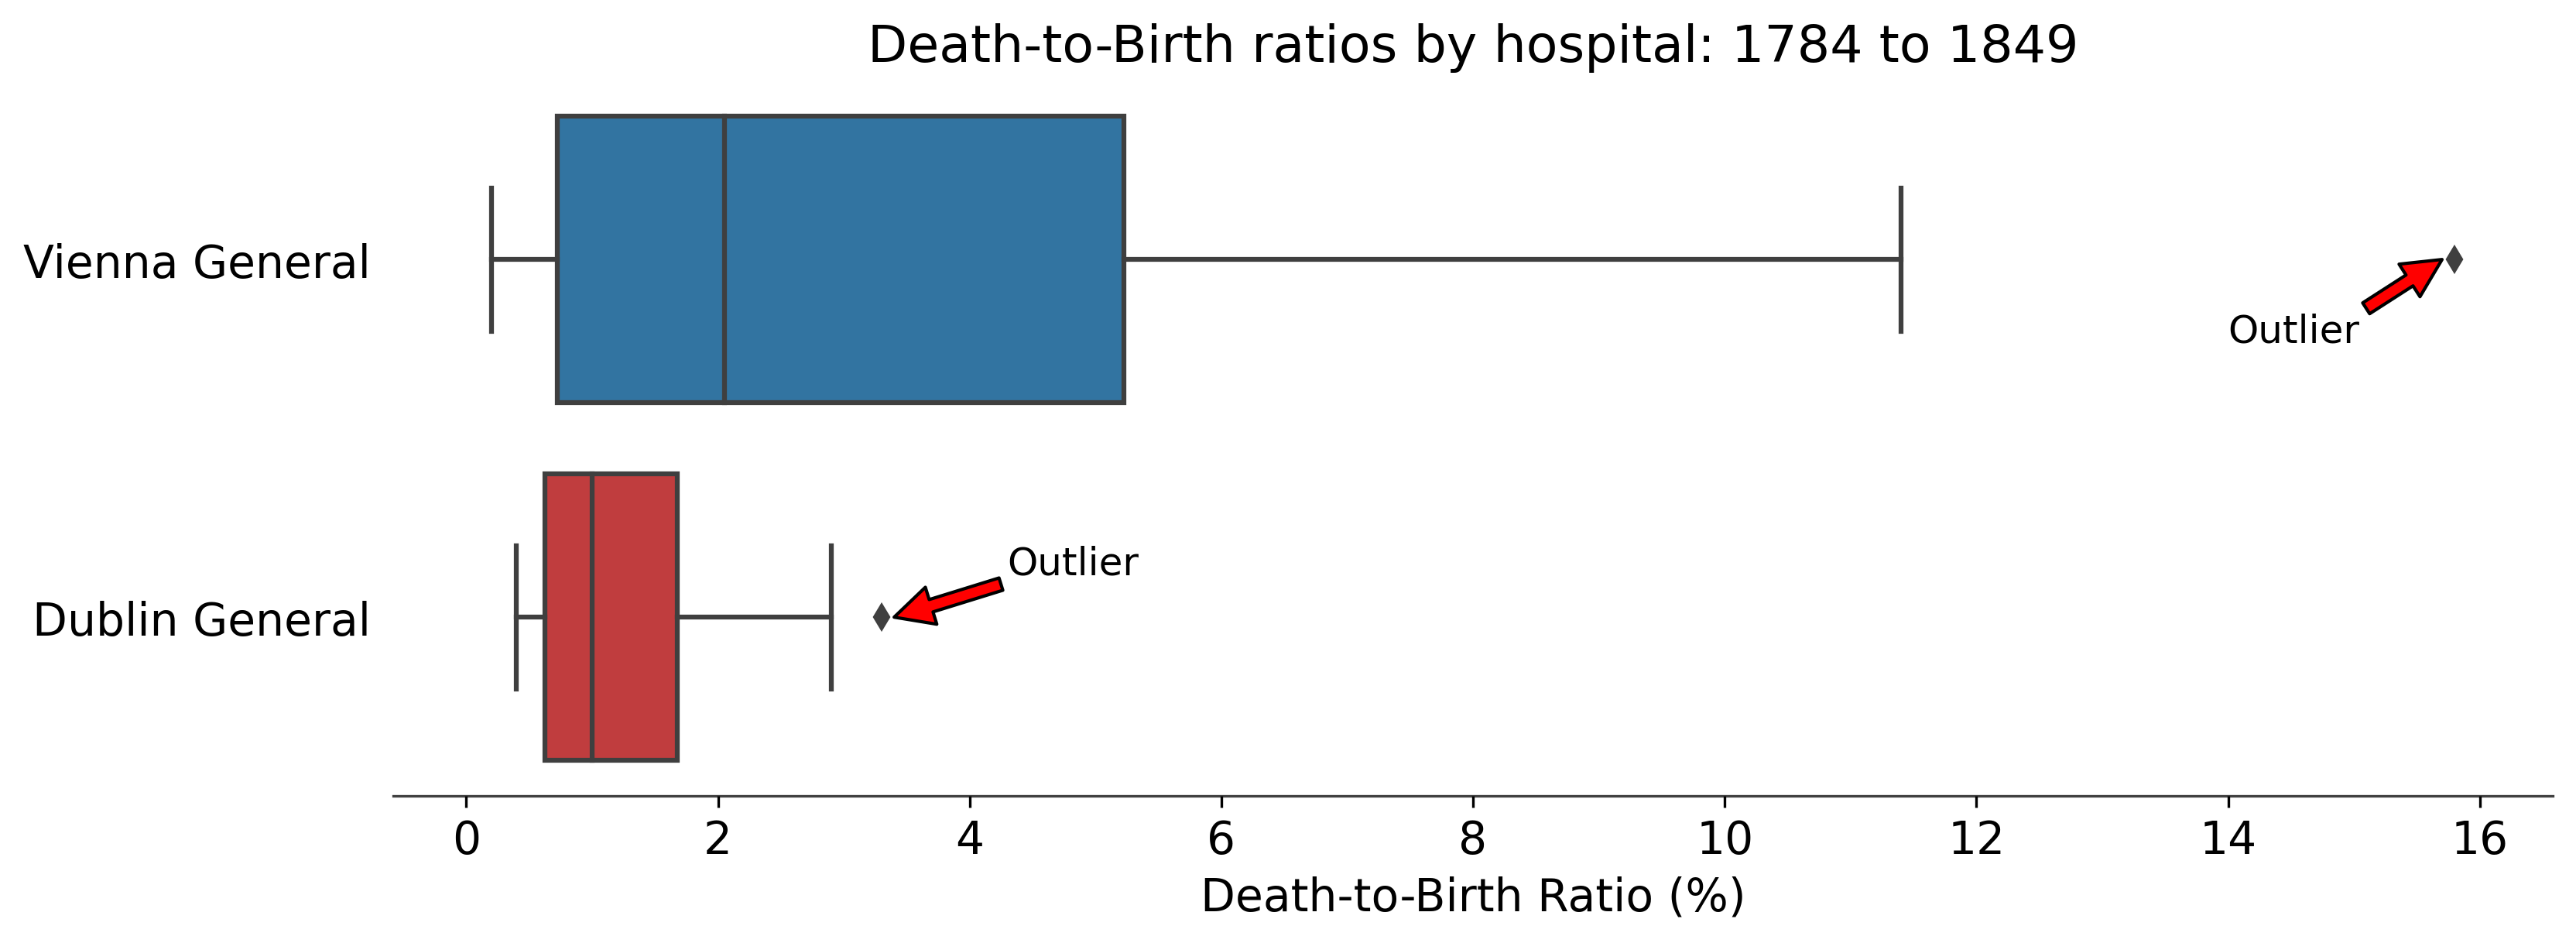

In [82]:
# Specify hospital order
hospital_order = ['Vienna General', 'Dublin General']

# Generate box plot of death-to-birth ratios according to hospital
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Create box plot 
sns.boxplot(data=df, x='Rate (%)', y='Hospital', 
            palette=['tab:blue','tab:red'],
           order=hospital_order)

# Remove spines and set alpha levels
ax.spines[['top','right','left']].set_visible(False)
ax.spines['bottom'].set_alpha(0.75)

# Specify the plot title
plt.title('Death-to-Birth ratios by hospital: 1784 to 1849', fontsize=16)

# Remove the ylabel
ax.set_ylabel('')
# Specify the xlabel
ax.set_xlabel('Death-to-Birth Ratio (%)', fontsize=14)

# Remove ticks but leave labels
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)

# Increase the tick label size
ax.tick_params(axis='both', which='major', labelsize=14)

# Annotations
plt.annotate('Outlier', xy=(15.7,0),
            xytext=(14,0.2), fontsize=12, 
            arrowprops=dict(facecolor='red'), va='center')

plt.annotate('Outlier', xy=(3.4,1),
            xytext=(4.3,0.85), fontsize=12,
            arrowprops=dict(facecolor='red'), va='center')

plt.show()

## Analysis: 5-number summary and outlier detection

In [92]:
# Vienna General 5-number summary
VG_results, VG_outliers = boxplotfeatures(VG_df, 'Rate (%)')
VG_results

,Feature,Value
0,Median,2.05
1,Q1,0.72
2,Q3,5.22
3,IQR,4.50
4,Lower bound,0.20
5,Upper bound,11.40


In [94]:
# Show outliers results for Vienna General
VG_outliers

,Hospital,Year,Births,Deaths,Rate (%)
58,Vienna General,1842,"3,287",518,15.8


In [90]:
# Dublin General 5-number summary and outliers
DG_results, DG_outliers = boxplotfeatures(DG_df, 'Rate (%)')
DG_results#, DG_outliers

,Feature,Value
0,Median,1.00
1,Q1,0.62
2,Q3,1.68
3,IQR,1.05
4,Lower bound,0.40
5,Upper bound,2.90


In [95]:
# Show outliers results for Dublin General
DG_outliers

,Hospital,Year,Births,Deaths,Rate (%)
42,Dublin General,1826,2440,81,3.3
